# Classification με Naive Bayes
## Μείωση διαστάσεων Principal component anaysis & Linear Discriminant Analysis
- Επιλέχθηκαν 1000 εικόνες από την κάθε κλάση και τοποθετήθηκαν στον αντίστοιχο φάκελο χειροκίνητα, η επιλογή έγινε με βάση τα ελάχιστα δεδομένα που απαιτούσε η εργασία.
- θυμίζω έγινε ενα χώρισμα των κλάσεων ανάμεσα σε εμένα (Οδυσσέας) και την Δήμητρα λόγω προβλήματος έλλειψης labels στα δικά της data, όπως είχαμε συζητήσει ακι στο μάθημα.

## Άνοιγμα των φακέλων διαδοχικά και εισαγωγή των εικόνων σε numpy arrays

In [ ]:
# Load images and labels
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

# # Define the input directory
input_dir = '/Users/odys/Desktop/ML_LOCAL_MAC/archive_1000pics'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through each folder (class name) in the input directory
for category in os.listdir(input_dir):
    category_path = os.path.join(input_dir, category)
    if os.path.isdir(category_path):  # Ensure it's a directory
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpeg') or file_name.endswith('.png'):  # Check for valid image files
                img_path = os.path.join(category_path, file_name)
                try:
                    # Open and preprocess the image
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    
                    # Append the image and its label
                    images.append(img_array)
                    labels.append(category)  # Use the folder name as the label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print some information about the loaded data
print(f"Loaded {len(images)} images.")
print(f"Image shape: {images[0].shape} ")
print(f"Labels: {np.unique(labels)}")


Loaded 4000 images.
Image shape: (64, 64) 
Labels: ['AbdomenCT' 'BreastMRI' 'Hand' 'HeadCT']


## Χώρισμα των δεδομένων σε train και test σύνολα.
 

In [ ]:
from sklearn.model_selection import train_test_split

# Set random_state for reproducibility
random_state = 42

# Split into train and test only
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.3, random_state=random_state, stratify=labels
)

print(f"Shape Train set: {X_train.shape}, labels: {y_train.shape}")
print(f"Shape Test set: {X_test.shape}, labels:{y_test.shape}")

Shape Train set: (2800, 64, 64), labels: (2800,)
Shape Test set: (1200, 64, 64), labels:(1200,)


## Naive Bayes δίχως κάποια μείωση διαστάσεων
- :Εξαιρετικά αποτελέσματα από την αρχη, με accuracy > 0.99

In [ ]:
# Naive Bayes classification without PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Flatten images for classification
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_test_std = scaler.transform(X_test_flat)

# Train Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_std, y_train)

# Predict on test set
y_pred = nb_clf.predict(X_test_std)

# Evaluate
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Test Accuracy: 0.9975

Naive Bayes Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       0.99      1.00      1.00       300
      HeadCT       1.00      0.99      0.99       300

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  0   0 300   0]
 [  0   0   3 297]]


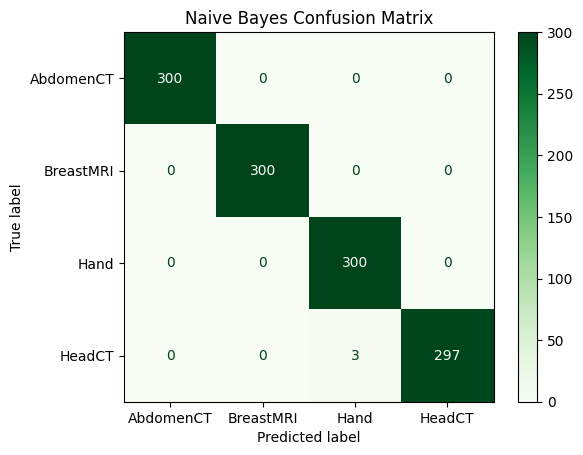

Accuracy: 0.9975
Precision (macro): 0.9975
Recall (macro): 0.9975
F1 Score (macro): 0.9975

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       1.00      1.00      1.00       300
        Hand       0.99      1.00      1.00       300
      HeadCT       1.00      0.99      0.99       300

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



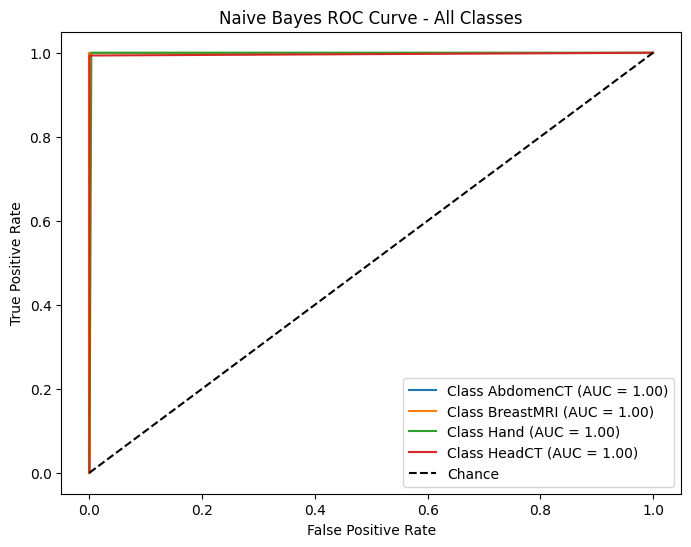

In [ ]:
# Assess the model's performance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,
    recall_score, f1_score, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

def assess_model_performance(clf, X_test, y_test, class_labels=None, title_prefix=""):
    """
    Assess and visualize the performance of a classifier.
    
    Parameters:
        clf: Trained classifier
        X_test: Test features
        y_test: True test labels
        class_labels: List of class labels (optional)
        title_prefix: String to prefix plot titles (optional)
    """
    # Predict
    y_pred = clf.predict(X_test)
    if class_labels is None:
        class_labels = np.unique(y_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred, labels=class_labels)
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(f"{title_prefix} Confusion Matrix")
    plt.show()

    # Accuracy, Precision, Recall, F1
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC Curve (if possible)
    y_score = None
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)

    if y_score is not None:
        y_test_bin = label_binarize(y_test, classes=class_labels)
        plt.figure(figsize=(8, 6))
        for i, class_label in enumerate(class_labels):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', label='Chance')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{title_prefix} ROC Curve - All Classes')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("ROC curve and AUC not available for this classifier.")

# Assess the Naive Bayes model performance
assess_model_performance(nb_clf, X_test_std, y_test, class_labels=np.unique(y_train), title_prefix="Naive Bayes")

##  Κανονικοποίηση & Principal component analysis
- Πριν την pca  εφαρμόσηκε «flatten» στα δεδομένα των εικόνων από (1000, 64,64)(1000, 4096) και κανονικοποίηση των τιμών των pixels με χρήση του standard scaler scikit learn [1]. Τα δεδομένα καταλήγουν με αυτόν τον τρόπο να έχουν μέση τιμή = 0 και τυπική απόκλιση=1.
- Επιλέχθηκε να "μειωθούν" οι εικόνεσ σε τόσα components, έτσι ώστε να διατηρηθεί τουλάχιστον το 90% του explained variance.
- Γ. Παναγάκης, L06-Διαστατικότητα των δεδομένων και PCA (Σειμειώσεις μαθήματος "Μηχανική μάθηση"), 2025. 
- A. Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, O’Reilly, 2022, p. 247.


Flattened images shape: (2800, 4096)
Standardized flattened images shape: (2800, 4096)
Number of components to explain at least 90% variance: 99


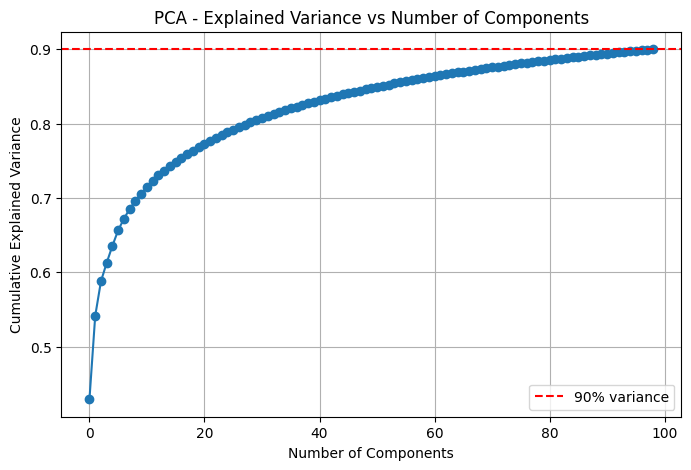

Original shape: (2800, 4096)
PCA reduced shape: (2800, 99)


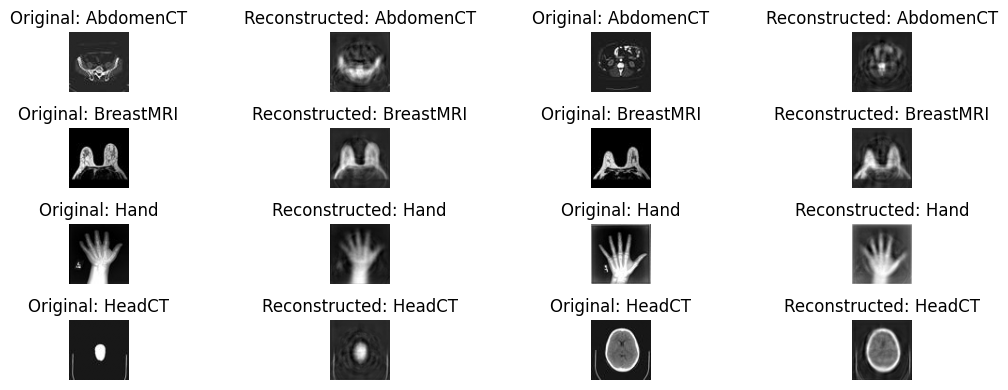

Original image and its PCA vector for each class:



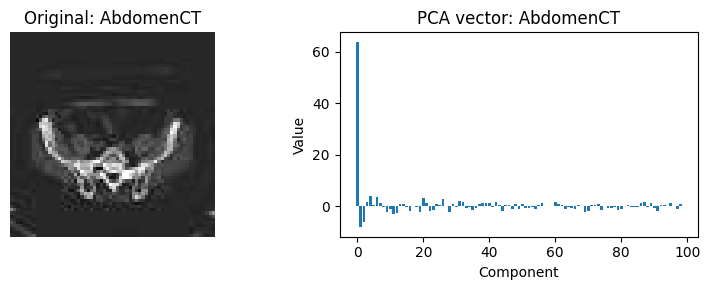

Class: AbdomenCT, PCA vector (first 10 components):
[63.93162429 -8.18977236 -6.00068652  1.65021872  4.0605337   0.64489745
  3.80017801  1.38884297 -0.06843822 -2.21262636]



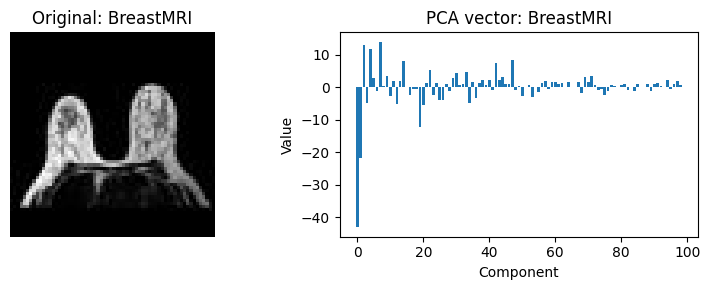

Class: BreastMRI, PCA vector (first 10 components):
[-43.12754752 -21.8493091   12.88196359  -4.86479354  11.91887087
   2.7792897   -1.2432994   14.06298742   0.55218399   3.43277187]



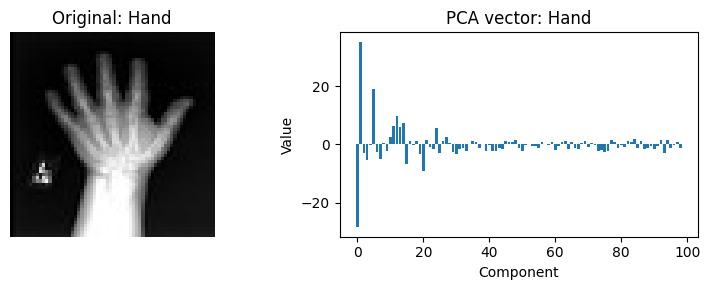

Class: Hand, PCA vector (first 10 components):
[-28.43248885  35.24944149  -2.79427962  -5.25135744  -0.27915133
  18.95039113  -2.42568496  -5.10079797   0.64006074  -2.40290822]



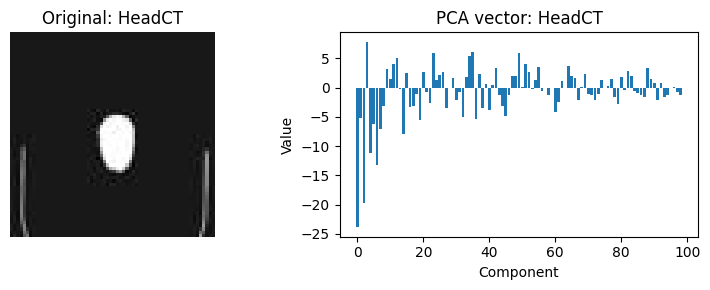

Class: HeadCT, PCA vector (first 10 components):
[-23.91545341  -5.2770418  -19.68050563   7.85033744 -11.15949932
  -6.22473074 -13.20154793  -7.10053899  -3.18191625   3.16935269]



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Flatten images for PCA
num_samples = X_train.shape[0]
flattened_images = X_train.reshape(num_samples, -1)
print(f"Flattened images shape: {flattened_images.shape}")

# Standardize
scaler = StandardScaler()
flattened_images_std = scaler.fit_transform(flattened_images)
print(f"Standardized flattened images shape: {flattened_images_std.shape}")

# Fit PCA without reducing dimensions to find explained variance
pca_full = PCA()
pca_full.fit(flattened_images_std)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components that explain at least 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to explain at least 90% variance: {n_components}")

# Now fit PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(flattened_images_std)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()

print(f"Original shape: {flattened_images.shape}")
print(f"PCA reduced shape: {principal_components.shape}")

# Plot the first 5 images of the training set
# Inverse transform to reconstruct images from PCA
reconstructed = pca.inverse_transform(principal_components)
reconstructed_images = scaler.inverse_transform(reconstructed)
reconstructed_images = reconstructed_images.reshape(X_train.shape)

# Plot 2 images per class: original vs reconstructed
unique_classes = np.unique(y_train)
images_per_class = 2

plt.figure(figsize=(10, 4))  # Bigger images

plot_idx = 1
for class_label in unique_classes:
    # Find indices for this class
    class_indices = np.where(y_train == class_label)[0][:images_per_class]
    for i, idx in enumerate(class_indices):
        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(X_train[idx], cmap='gray')
        plt.title(f"Original: {class_label}")
        plt.axis('off')
        plot_idx += 1

        plt.subplot(len(unique_classes), images_per_class * 2, plot_idx)
        plt.imshow(reconstructed_images[idx], cmap='gray')
        plt.title(f"Reconstructed: {class_label}")
        plt.axis('off')
        plot_idx += 1

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()


# For each class, show an original image and its PCA vector (principal component values)
print("Original image and its PCA vector for each class:\n")
for class_label in unique_classes:
    # Find the first index for this class
    idx = np.where(y_train == class_label)[0][0]
    plt.figure(figsize=(8,3))
    
    # Show the original image
    plt.subplot(1,2,1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f"Original: {class_label}")
    plt.axis('off')
    
    # Show the principal component vector as a bar plot
    plt.subplot(1,2,2)
    plt.bar(np.arange(n_components), principal_components[idx])
    plt.title(f"PCA vector: {class_label}")
    plt.xlabel("Component")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()
    
    # Print the PCA vector values
    print(f"Class: {class_label}, PCA vector (first 10 components):\n{principal_components[idx][:10]}\n")

## Naive Bayesμε με μείωση διαστάσεων PCA
- Μικρή απώλεια στο accurcy, το μειωμένο φορτίο υπολογισμών είναι πολύ ευπρόσδεκτο και θεωρώ πως διακαιολογεί την επιλογή της χρήσης της PCA.

In [ ]:
#  classification with PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Flatten and standardize validation and test sets using the same scaler as training
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_test_std = scaler.transform(X_test_flat)

# Apply PCA transformation using the same PCA fitted on training data
X_test_pca = pca.transform(X_test_std)

# Use PCA-reduced features for training
X_train_pca = principal_components  # Already computed for training set


# Train Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_pca, y_train)

# Predict on test set
y_pred = nb_clf.predict(X_test_pca)

# Evaluate
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Test Accuracy: 0.985

Naive Bayes Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       0.95      1.00      0.97       300
        Hand       1.00      0.99      1.00       300
      HeadCT       0.99      0.95      0.97       300

    accuracy                           0.98      1200
   macro avg       0.99      0.98      0.98      1200
weighted avg       0.99      0.98      0.98      1200



## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  0   0 298   2]
 [  0  16   0 284]]


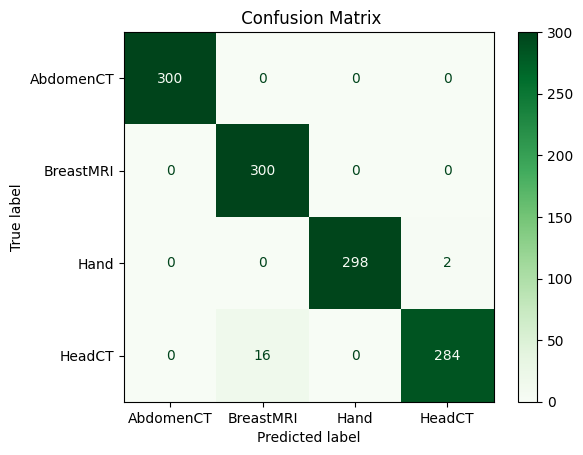

Accuracy: 0.9850
Precision (macro): 0.9856
Recall (macro): 0.9850
F1 Score (macro): 0.9850

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       0.95      1.00      0.97       300
        Hand       1.00      0.99      1.00       300
      HeadCT       0.99      0.95      0.97       300

    accuracy                           0.98      1200
   macro avg       0.99      0.98      0.98      1200
weighted avg       0.99      0.98      0.98      1200



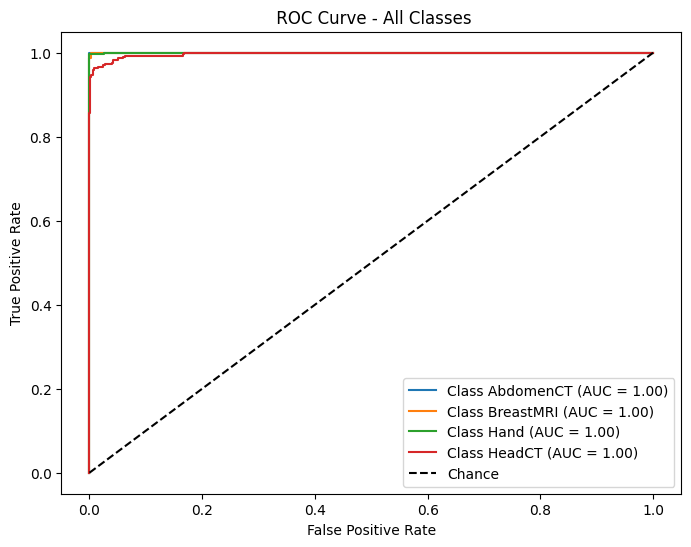

In [ ]:
assess_model_performance(nb_clf, X_test_pca, y_test)

## Συναρτηση για εκτύπωση του ορίου απόφασης
- θα ξαναχρησιμοποιηθεί και σε άλλα σημεια του κώδικα
- τα δεδομένα μας πρέπει να έρθουν σε 2 διαστάσεις

In [ ]:
def plot_decision_boundary_2d(clf, X_2d, y, title="Decision Boundary", xlabel="Component 1", ylabel="Component 2", cmap=plt.cm.Set1):
    """
    Plots the decision boundary for a classifier trained on 2D data.
    
    Parameters:
        clf: Trained classifier (must support predict)
        X_2d: 2D feature array (n_samples, 2)
        y: Labels (n_samples,)
        title: Plot title
        xlabel: Label for x-axis
        ylabel: Label for y-axis
        cmap: Matplotlib colormap
    """
    import numpy as np
    import matplotlib.pyplot as plt

    # Create a mesh to plot the decision boundary
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Map class labels to integer indices for contourf
    class_labels = np.unique(y)
    label_to_int = {label: idx for idx, label in enumerate(class_labels)}
    Z_int = np.array([label_to_int[label] for label in Z])
    Z_int = Z_int.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_int, alpha=0.3, cmap=cmap)

    # Plot training points
    for class_label in class_labels:
        idx = np.where(y == class_label)
        plt.scatter(X_2d[idx, 0], X_2d[idx, 1], label=class_label, edgecolor='k', s=40)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

## Εκτύπωση ορίου απόφασης με χρήση της αντίστοιχης συνάρτησης που κατασκευάστηκε παραπάνω

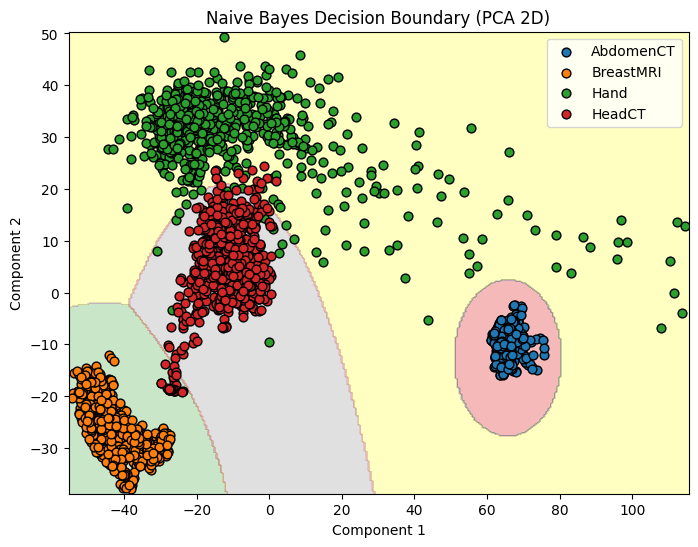

In [ ]:
# Plot decision boundary using the first two PCA components (if available)
if 'X_train_pca' in locals() and X_train_pca.shape[1] >= 2:
    # Train a new GaussianNB on just the first two PCA components
    nb_clf_2d = GaussianNB()
    nb_clf_2d.fit(X_train_pca[:, :2], y_train)
    plot_decision_boundary_2d(nb_clf_2d, X_train_pca[:, :2], y_train, title="Naive Bayes Decision Boundary (PCA 2D)")
else:
    print("PCA features with at least 2 components are required to plot the decision boundary.")

## Αναζήτηση και χρήση των βέλτιστων παραμέτρων με χρήση του GridSearchCV
- Το σημαντικό έδω είναι το σύνολο των παραμέτρων (δικιμαζόμενες τιμές) που θα χρησιμοποιήσουμε.
- Εδω έγινε μια αρχή βασιζόμενη στην βιβλιογράφια (Practical deep learning : a python-based introduction, Ronald T. Kneusel. &  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,A. Géron ) και έπειτα έγιναν δοκιμές με διαφορετικές τιμές μέχρι να καταλήξει στο σύνολο param_grid που φαίνεται παρακάτω.

- Δεν βελτιωθηκαν τα αποτελέσματα σε σύγκριση με την απλή PCA εκδοχή, δεν δικαιολογεί την αύξηση του κόστους υπολογισμών.

In [ ]:
# Grid search for best hyperparameters in Naive Bayes with PCA features

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid for GaussianNB
param_grid = {
    'var_smoothing': np.logspace(0, -50, 10)  # Typical range for var_smoothing
}

# Initialize GaussianNB classifier
nb = GaussianNB()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=1
)

# Fit on PCA-reduced training data
grid_search.fit(X_train_pca, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test_pca)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'var_smoothing': 2.782559402207126e-06}
Best cross-validation score: 0.9867867309600477
Naive Bayes Test Accuracy: 0.985

Naive Bayes Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       0.95      1.00      0.97       300
        Hand       1.00      0.99      1.00       300
      HeadCT       0.99      0.95      0.97       300

    accuracy                           0.98      1200
   macro avg       0.99      0.98      0.98      1200
weighted avg       0.99      0.98      0.98      1200



## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [  0   0 298   2]
 [  0  16   0 284]]


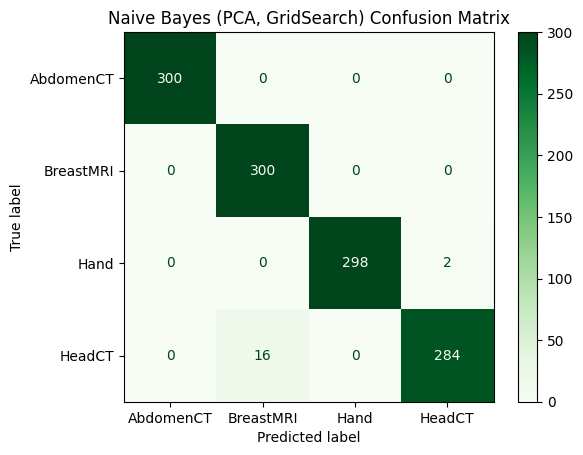

Accuracy: 0.9850
Precision (macro): 0.9856
Recall (macro): 0.9850
F1 Score (macro): 0.9850

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       1.00      1.00      1.00       300
   BreastMRI       0.95      1.00      0.97       300
        Hand       1.00      0.99      1.00       300
      HeadCT       0.99      0.95      0.97       300

    accuracy                           0.98      1200
   macro avg       0.99      0.98      0.98      1200
weighted avg       0.99      0.98      0.98      1200



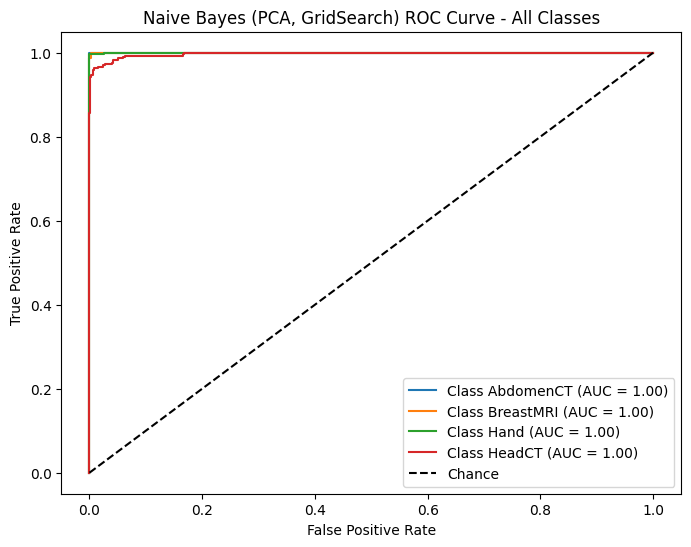

In [ ]:
assess_model_performance(grid_search.best_estimator_, X_test_pca, y_test, class_labels=np.unique(y_train), title_prefix="Naive Bayes (PCA, GridSearch)")

## Εκτύπωση ορίου απόφασης με χρήση της αντίστοιχης συνάρτησης που κατασκευάστηκε παραπάνω

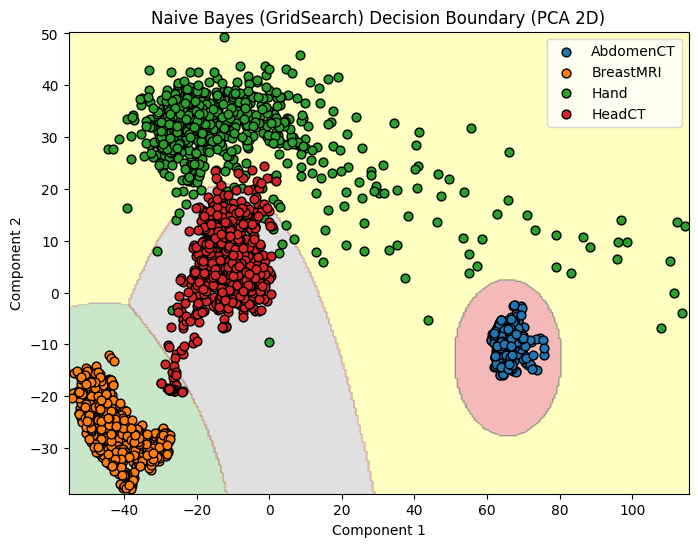

In [ ]:
# Plot decision boundary for the GridSearch-optimized Naive Bayes model (first two PCA components)
if 'X_train_pca' in locals() and X_train_pca.shape[1] >= 2:
    nb_clf_2d = grid_search.best_estimator_
    nb_clf_2d.fit(X_train_pca[:, :2], y_train)
    plot_decision_boundary_2d(nb_clf_2d, X_train_pca[:, :2], y_train, title="Naive Bayes (GridSearch) Decision Boundary (PCA 2D)")
else:
    print("PCA features with at least 2 components are required to plot the decision boundary.")


##  Κανονικοποίηση & Linear Discriminant Analysis
- Πριν την LDA  εφαρμόσηκε «flatten» στα δεδομένα των εικόνων από (1000, 64,64) --> (1000, 4096) και κανονικοποίηση των τιμών των pixels με χρήση του standard scaler scikit learn [1]. Τα δεδομένα καταλήγουν με αυτόν τον τρόπο να έχουν μέση τιμή = 0 και τυπική απόκλιση=1.
- Ο μέγιστος αρθμος cmponents που μπορεί η LDA να βρέι έιναι ισος με τον αριθμό των κλάσεων-1 αρα για εμένα ίσος με 3.


In [ ]:
# LDA (Linear Discriminant Analysis) 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Flatten images for LDA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(f"Flattened train shape: {X_train_flat.shape}")
print(f"Flattened test shape: {X_test_flat.shape}")
# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_flat)
X_test_std = scaler.transform(X_test_flat)

# Number of LDA components (at most n_classes - 1)
n_classes = len(np.unique(y_train))
n_components = n_classes - 1

# Fit LDA on training data
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

print("LDA reduced train shape:", X_train_lda.shape)
print("LDA reduced test shape:", X_test_lda.shape)

Flattened train shape: (2800, 4096)
Flattened test shape: (1200, 4096)
LDA reduced train shape: (2800, 3)
LDA reduced test shape: (1200, 3)


## Naive Bayes Μοντέλο με μείωση διαστάσεων με LDA
- Σημαντική μείωση στην accuracy, παρά την μείωση του υπολογιστικού κόστος δεν δικαιολογείται η χρήση της.

In [ ]:
# Naive Bayes classification with LDA

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Train Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train_lda, y_train)

# Predict on test set
y_pred = nb_clf.predict(X_test_lda)

# Get parameters
print("Naive Bayes Classifier Parameters:", nb_clf.get_params())

# Evaluate
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Classifier Parameters: {'priors': None, 'var_smoothing': 1e-09}
Naive Bayes Test Accuracy: 0.8583333333333333

Naive Bayes Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.73      1.00      0.85       300
   BreastMRI       0.96      1.00      0.98       300
        Hand       0.99      0.48      0.65       300
      HeadCT       0.86      0.95      0.90       300

    accuracy                           0.86      1200
   macro avg       0.89      0.86      0.84      1200
weighted avg       0.89      0.86      0.84      1200



## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [100   7 145  48]
 [  9   5   1 285]]


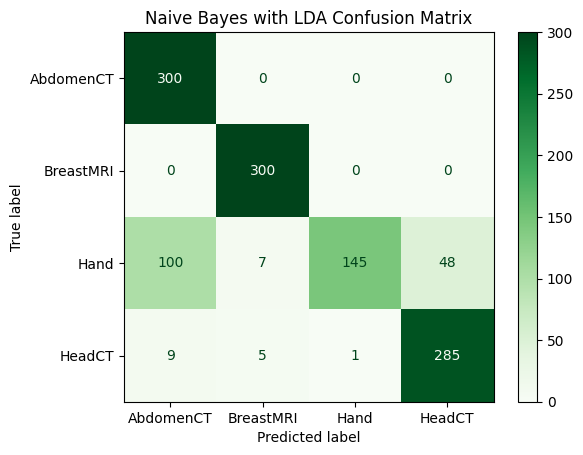

Accuracy: 0.8583
Precision (macro): 0.8860
Recall (macro): 0.8583
F1 Score (macro): 0.8443

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.73      1.00      0.85       300
   BreastMRI       0.96      1.00      0.98       300
        Hand       0.99      0.48      0.65       300
      HeadCT       0.86      0.95      0.90       300

    accuracy                           0.86      1200
   macro avg       0.89      0.86      0.84      1200
weighted avg       0.89      0.86      0.84      1200



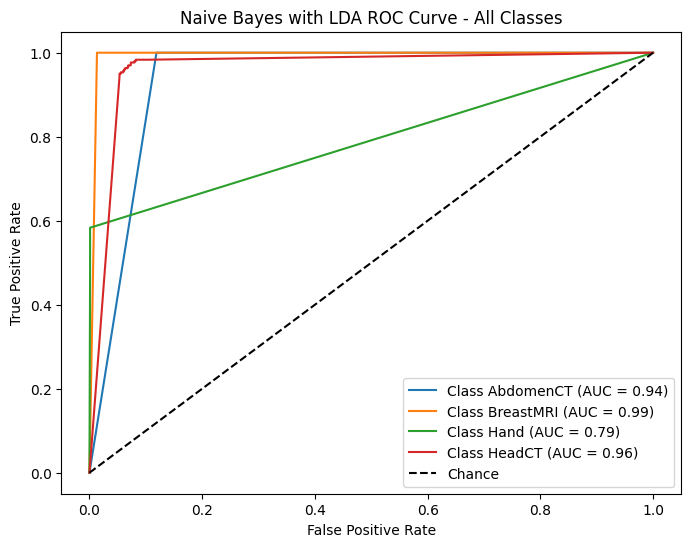

In [ ]:
assess_model_performance(nb_clf, X_test_lda, y_test, class_labels=np.unique(y_train), title_prefix="Naive Bayes with LDA")

## Εκτύπωση ορίου απόφασης με χρήση της αντίστοιχης συνάρτησης που κατασκευάστηκε παραπάνω

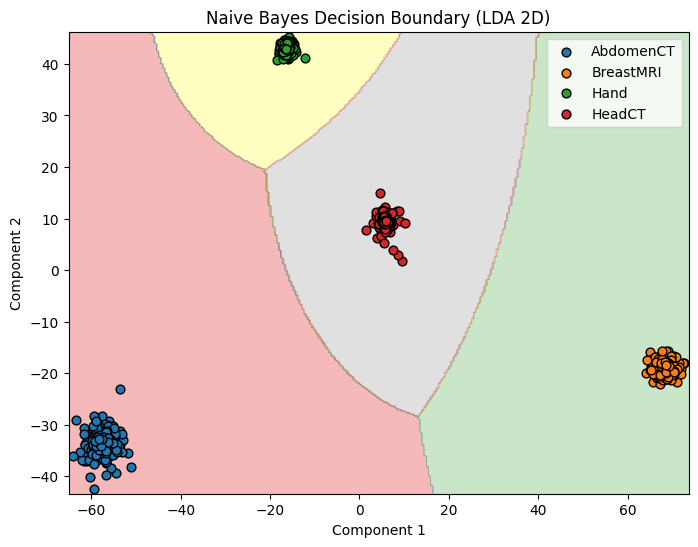

In [ ]:
# Plot decision boundary using the first two LDA components (if available)
if 'X_train_lda' in locals() and X_train_lda.shape[1] >= 2:
    nb_clf_lda_2d = GaussianNB()
    nb_clf_lda_2d.fit(X_train_lda[:, :2], y_train)
    plot_decision_boundary_2d(nb_clf_lda_2d, X_train_lda[:, :2], y_train, title="Naive Bayes Decision Boundary (LDA 2D)")
else:
    print("LDA features with at least 2 components are required to plot the decision boundary.")

## Αναζήτηση και χρήση των βέλτιστων παραμέτρων με χρήση του GridSearchCV
- Το σημαντικό έδω είναι το σύνολο των παραμέτρων (δικιμαζόμενες τιμές) που θα χρησιμοποιήσουμε.
- Εδω έγινε μια αρχή βασιζόμενη στην βιβλιογράφια (Practical deep learning : a python-based introduction, Ronald T. Kneusel. &  Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow,A. Géron ) και έπειτα έγιναν δοκιμές με διαφορετικές τιμές μέχρι να καταλήξει στο σύνολο param_grid που φαίνεται παρακάτω.

- Δεν προσφέρει αύξηση συγκριτικά με το μοντέλο δίχως μείωση δαιστάσεων είτε με το βασικό μοντέλο με PCA, δεν διακιολογεί το αυξημένο υπολογιστικό κόστος του.


In [ ]:
# Grid search for best hyperparameters in Naive Bayes with LDA features

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grid for GaussianNB
param_grid = {
    'var_smoothing': np.logspace(0, -9, 100)  # Typical range for var_smoothing
}

# Initialize GaussianNB classifier
nb = GaussianNB()

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit on PCA-reduced training data
grid_search.fit(X_train_lda, y_train)

# Best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test_lda)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ..................var_smoothing=0.432

## Αξιολόγιση του μοντέλου
- Confusion matrix
- Classification reporta
- ROC curve

Confusion Matrix:
 [[300   0   0   0]
 [  0 300   0   0]
 [ 15   5 248  32]
 [  2   1  14 283]]


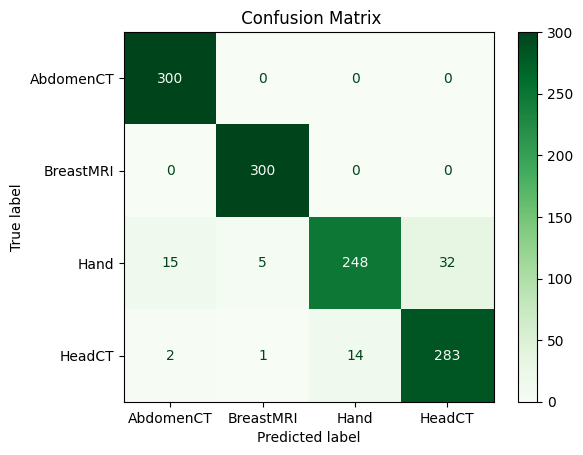

Accuracy: 0.9425
Precision (macro): 0.9429
Recall (macro): 0.9425
F1 Score (macro): 0.9414

Classification Report:
               precision    recall  f1-score   support

   AbdomenCT       0.95      1.00      0.97       300
   BreastMRI       0.98      1.00      0.99       300
        Hand       0.95      0.83      0.88       300
      HeadCT       0.90      0.94      0.92       300

    accuracy                           0.94      1200
   macro avg       0.94      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



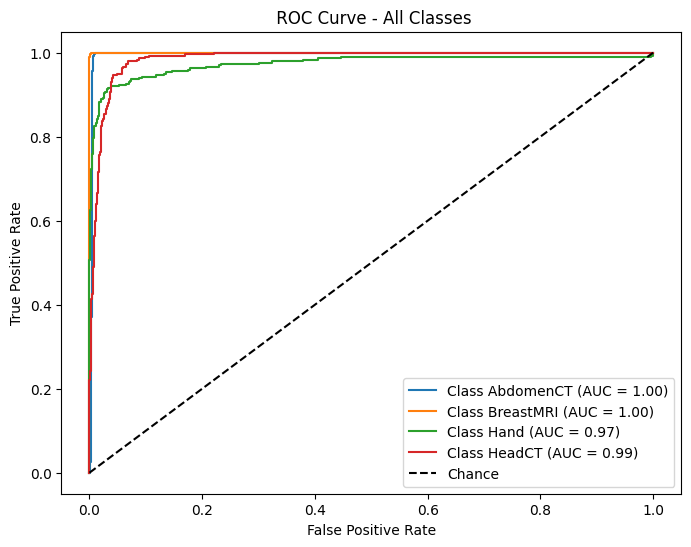

In [ ]:
assess_model_performance(grid_search.best_estimator_, X_test_lda, y_test)

## Εκτύπωση ορίου απόφασης με χρήση της αντίστοιχης συνάρτησης που κατασκευάστηκε παραπάνω

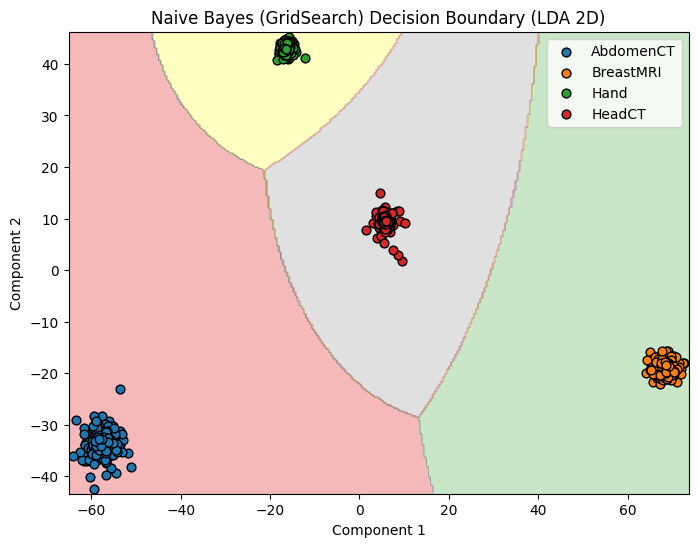

Exception ignored in: <function ResourceTracker.__del__ at 0x10dba40e0>
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1036ac0e0>
Traceback (most recent call last):
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/Cellar/python@3.12/3.12.10/Frameworks/Python.framework/Versions/3.12/l

In [ ]:
# Plot decision boundary for the GridSearch-optimized Naive Bayes model (first two LDA components)
if 'X_train_lda' in locals() and X_train_lda.shape[1] >= 2:
    nb_clf_lda_2d = grid_search.best_estimator_
    nb_clf_lda_2d.fit(X_train_lda[:, :2], y_train)
    plot_decision_boundary_2d(nb_clf_lda_2d, X_train_lda[:, :2], y_train, title="Naive Bayes (GridSearch) Decision Boundary (LDA 2D)")
else:
    print("LDA features with at least 2 components are required to plot the decision boundary.")